# MONTAR DRIVE Y CARGAR LIBRERÍAS DE BASE

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install gdown==4.6.0
import gdown
!pip install openpyxl

  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0


## Cargar Excel con tablas de Transcripts

Decido cargar cada pestaña del excel por separado, para realizar cleaning básico y separar los elementos. Una vez tenga una tabla cleaneada la podré concatenar con las siguientes formando un dataset final único con todos los episodios.

In [4]:
try:
    df = pd.read_excel('/content/drive/Shareddrives/Capstone/preprocessing_wip_Maite/transcripts.xlsx', index_col=None, header=None, sheet_name=None)

    dfs_list = []

    for sheet_name, df in df.items():
        df[['Temporada', 'Episodio']] = df.iloc[0, :].str.split('x', expand=True)
        df[['Episodio', 'Titulo']] = df['Episodio'].str.split('-', expand=True)

        split_cols = df.iloc[:, 0].astype(str).str.split(':', n=1, expand=True)

        if split_cols.shape[1] == 2:
            df[['Personaje', 'Texto']] = split_cols
        else:
            df['Personaje'] = None
            df['Texto'] = df.iloc[:, 0]

        temporada_value = df['Temporada'].iloc[0]
        episodio_value = df['Episodio'].iloc[0]
        titulo_value = df['Titulo'].iloc[0]

        df['Temporada'] = df['Temporada'].fillna(temporada_value)
        df['Episodio'] = df['Episodio'].fillna(episodio_value)
        df['Titulo'] = df['Titulo'].fillna(titulo_value)
        df = df.drop(df.index[0])

        dfs_list.append(df)

    if dfs_list:
        final_df = pd.concat(dfs_list, ignore_index=True)
        final_df = final_df.drop(final_df.columns[0], axis=1)
        output_path = '/content/drive/Shareddrives/Capstone/preprocessing_wip_Maite/final_df.xlsx'
        final_df.to_excel(output_path, index=False)
    else:
        print("No dataframes were processed.")

except ValueError as e:
    print(f'Error de formato del archivo Excel: {e}')
except FileNotFoundError as e:
    print(f'Error al encontrar el archivo: {e}')
except pd.errors.ParserError as e:
    print(f'Error al analizar el archivo Excel: {e}')
except Exception as e:
    print(f'Error desconocido: {e}')

# <font color='red'>PREPROCESAMIENTO</font>

### Limpieza básica del dataset

#### Homogeneizar los nombres de los personajes

In [5]:
final_df['Personaje'] = final_df['Personaje'].str.lower()
personajes = final_df['Personaje'].unique()
personajes = sorted(personajes)
personajes

['',
 'administrator',
 'agent',
 'agent on phone',
 'all three women',
 'andrea',
 'andrew',
 'answering machine',
 'antonio',
 'artie',
 'asac ramey',
 'attorney',
 'badger',
 'barry',
 'bartender',
 'ben',
 'biker',
 'bobby',
 'bogdan',
 'bolsa',
 'both',
 'brock',
 'buyer',
 'car wash woman',
 'cara',
 'carmen',
 'chad',
 'chad’s girlfriend',
 'charlie rose',
 'chow',
 'clovis',
 'combo',
 'commercial guy #1',
 'commercial guy #2',
 'cop',
 'counselor',
 'coworker',
 'customer',
 'cynthia',
 'dan',
 'dea agent 1',
 'dealer',
 'declan',
 'doctor',
 'donald',
 'dorothy',
 'dr. bravenec',
 'dr. delcavoli',
 'driver',
 'drug dealer',
 'elliott',
 'elliott schwartz',
 'emilio',
 'employee',
 'emt',
 'everyone',
 'farley',
 'francesa',
 'francesca',
 'friend',
 'friend #2',
 'gale',
 'girl cop',
 'gomez',
 'gonzo',
 'grandma',
 'gretchen',
 'gretchen schwartz',
 'group',
 'group leader',
 'gus',
 'gustavo',
 'guy',
 'hank',
 'hank(on the news)',
 'hector',
 'holly',
 'homeless man',
 'hu

In [6]:
final_df['Personaje'].replace(['walt jr', 'hank(on the news)', 'reporter(on the news)', 'walter junior', 'walter(answering machine)', 'jesse(answering machine)', 'jane’s voicemail', 'walt', 'tv', 'elliott schwartz', 'gretchen schwartz', 'junior', 'gus', 'kaylie', 'ken', 'real estate agent', 'walt','neo-nazi','dealer','francesa','skyler (voicemail)','markert','lyda','neo nazi','drug dealer','asac ramey','ramey'], ['walter jr', 'hank', 'reporter', 'walter jr', 'walter', 'jesse', 'jane', 'walter', 'tv', 'elliott', 'gretchen', 'walter jr', 'gustavo', 'kaylee', 'kenny', 'realtor', 'walter','neonazi','drug-dealer','francesca','skyler','merket','lydia','neonazi','drug-dealer','sac ramey','sac ramey'], inplace=True)

# No voy a tocar a Skyler (Walt's Imagination)

In [7]:
personajes = final_df['Personaje'].unique()
personajes.sort()
personajes

array(['', 'administrator', 'agent', 'agent on phone', 'all three women',
       'andrea', 'andrew', 'answering machine', 'antonio', 'artie',
       'attorney', 'badger', 'barry', 'bartender', 'ben', 'biker',
       'bobby', 'bogdan', 'bolsa', 'both', 'brock', 'buyer',
       'car wash woman', 'cara', 'carmen', 'chad', 'chad’s girlfriend',
       'charlie rose', 'chow', 'clovis', 'combo', 'commercial guy #1',
       'commercial guy #2', 'cop', 'counselor', 'coworker', 'customer',
       'cynthia', 'dan', 'dea agent 1', 'declan', 'doctor', 'donald',
       'dorothy', 'dr. bravenec', 'dr. delcavoli', 'driver',
       'drug-dealer', 'elliott', 'emilio', 'employee', 'emt', 'everyone',
       'farley', 'francesca', 'friend', 'friend #2', 'gale', 'girl cop',
       'gomez', 'gonzo', 'grandma', 'gretchen', 'group', 'group leader',
       'gustavo', 'guy', 'hank', 'hector', 'holly', 'homeless man',
       'huell', 'hugo', 'intercom', 'jack', 'jake', 'jane', 'janet',
       'janice', 'jeffrey',

In [8]:
num_rows_per_personaje = final_df.groupby('Personaje')['Texto'].count().sort_values(ascending=False)

num_rows_per_personaje.head(10)

,Texto
Personaje,
,9236
walter,2553
jesse,1472
skyler,1008
scene,980
hank,715
marie,359
walter jr,353
saul,275


## Importar Librerías

In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from itertools import combinations

In [10]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# init lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [11]:
for word in sorted(stop_words):
  print(word)

a
about
above
after
again
against
ain
all
am
an
and
any
are
aren
aren't
as
at
be
because
been
before
being
below
between
both
but
by
can
couldn
couldn't
d
did
didn
didn't
do
does
doesn
doesn't
doing
don
don't
down
during
each
few
for
from
further
had
hadn
hadn't
has
hasn
hasn't
have
haven
haven't
having
he
her
here
hers
herself
him
himself
his
how
i
if
in
into
is
isn
isn't
it
it's
its
itself
just
ll
m
ma
me
mightn
mightn't
more
most
mustn
mustn't
my
myself
needn
needn't
no
nor
not
now
o
of
off
on
once
only
or
other
our
ours
ourselves
out
over
own
re
s
same
shan
shan't
she
she's
should
should've
shouldn
shouldn't
so
some
such
t
than
that
that'll
the
their
theirs
them
themselves
then
there
these
they
this
those
through
to
too
under
until
up
ve
very
was
wasn
wasn't
we
were
weren
weren't
what
when
where
which
while
who
whom
why
will
with
won
won't
wouldn
wouldn't
y
you
you'd
you'll
you're
you've
your
yours
yourself
yourselves


## Definir Filler Words

In [12]:
# No es necesario crear filler_words ya que la mayoría de las palabras de relleno ya están incluidas en las stop_words

# filler_words = {'um', 'got', 'uh', 'like', "youre", "im", 'you', 'ah', 'er', 'mm', 'oh', 'okay',
#                 'know', 'the', 'that', 'thats', 'there', 'this'}

## Preprocesar texto

In [13]:
nans = final_df['Texto'].isna().sum()
print(nans)

0


In [14]:
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove special chars
    text = text.lower()  # lowercase
    words = word_tokenize(text)  # tokenize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # lemmatize
    return words

# apply preprocessing
final_df['Palabras_clave'] = final_df['Texto'].apply(preprocess_text)

output_path = '/content/drive/Shareddrives/Capstone/preprocessing_wip_Maite/final_df_words.xlsx'

final_df.to_excel(output_path, index=False)

# <font color='red'>OBTENCIÓN DE SENTIMIENTOS - Rule-Based Approaches - LEXICONS</font>

## <font color='red'>TEXTBLOB</font>

Built on top of NLTK and simple to implement.

### Obtener sentimientos con TEXTBLOB

In [15]:
# sentiment polarity
def get_sentiment(text):
    return TextBlob(' '.join(text)).sentiment.polarity

# apply sentiment analysis
final_df['Sentimiento'] = final_df['Palabras_clave'].apply(get_sentiment)

output_path = '/content/drive/Shareddrives/Capstone/preprocessing_wip_Maite/final_df_words_sentiments.xlsx'

final_df.to_excel(output_path, index=False)

In [16]:
sentimientos = final_df[final_df['Sentimiento'] != 0]['Sentimiento']
sentimientos

,Sentimiento
0,0.128788
3,0.800000
9,0.800000
11,-0.300000
12,0.250000
...,...
19897,-0.250000
19900,-0.065000
19901,-0.100000
19902,-0.300000


### Histograma de sentimientos con TEXTBLOB

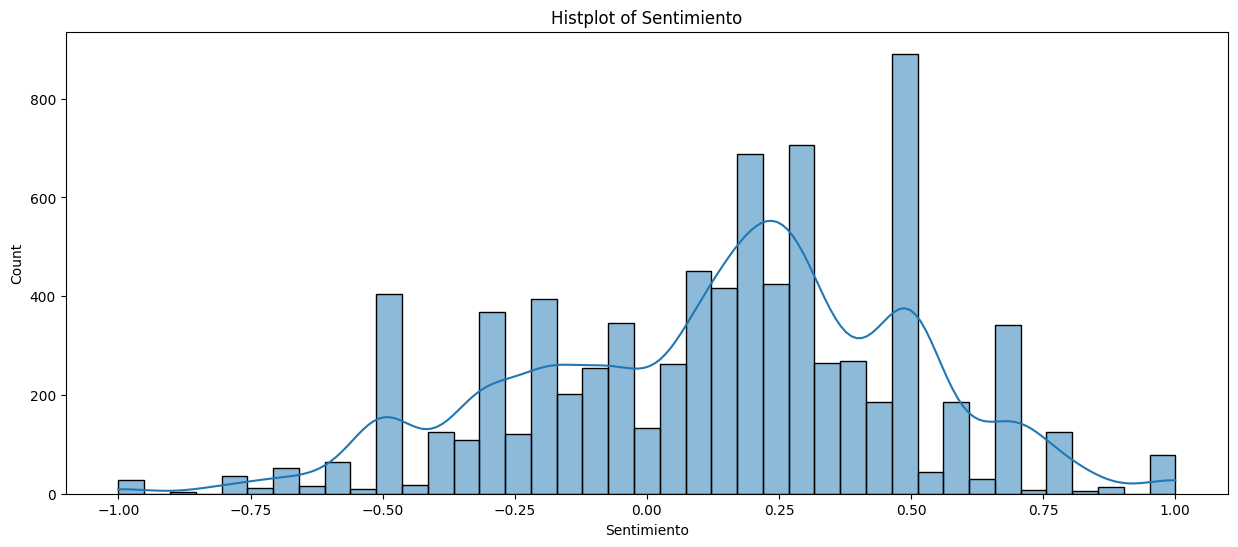

In [17]:
plt.figure(1 , figsize = (15 , 6))
n = 0
sns.histplot(sentimientos , kde=True)
plt.title('Histplot of Sentimiento')
plt.show()

### Plottear la distribución de sentimientos por cada personaje

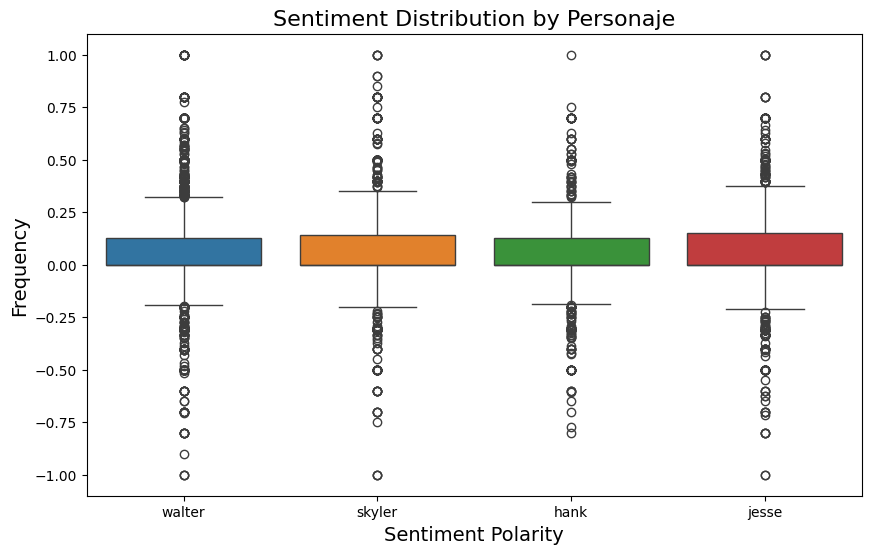

In [18]:
personajes_seleccionados = ['walter', 'jesse', 'skyler', 'hank']
df_personajes_seleccionados = final_df[final_df['Personaje'].isin(personajes_seleccionados)]

# Plot sentiment distribution with 'Personaje' as hue
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_personajes_seleccionados, x='Personaje', y='Sentimiento', hue='Personaje')

# Set title and labels
plt.title('Sentiment Distribution by Personaje', fontsize=16)
plt.xlabel('Sentiment Polarity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the plot
plt.show()

### Agrupar sentimientos por cada episodio y realizar plot

In [19]:
# Convertir temporada y episodio en variables numéricas

final_df['Temporada'] = final_df['Temporada'].astype(int)
final_df['Episodio'] = final_df['Episodio'].astype(int)

In [20]:
# Quitar valores centrales iguales a cero

# final_df = final_df[final_df['Sentimiento'] != 0]

# Elegir sólo los valores negativos

# final_df_menor_cero = final_df[final_df['Sentimiento'] < 0]

In [21]:
sentimiento_episodio = final_df.groupby(['Temporada', 'Episodio'])['Sentimiento'].mean().reset_index()

# sentimiento_episodio = final_df_menor_cero.groupby(['Temporada', 'Episodio'])['Sentimiento'].sum().reset_index()

print(sentimiento_episodio)

    Temporada  Episodio  Sentimiento
0           1         1     0.046225
1           1         2     0.074792
2           1         3     0.007443
3           1         4     0.062136
4           1         5     0.096932
..        ...       ...          ...
57          5        12     0.031017
58          5        13     0.041613
59          5        14     0.022583
60          5        15     0.036799
61          5        16     0.041842

[62 rows x 3 columns]


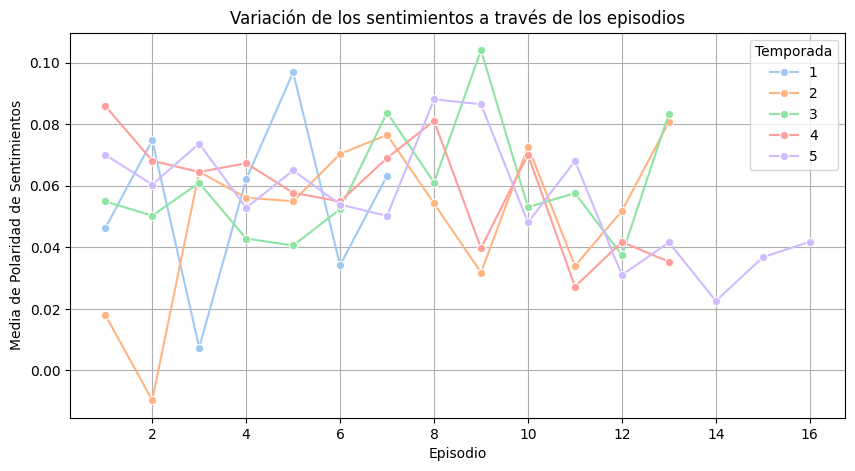

In [22]:
# plot sentiment trend
plt.figure(figsize=(10, 5))
sns.lineplot(data=sentimiento_episodio, x='Episodio', y='Sentimiento', hue='Temporada', marker='o', palette='pastel')
plt.title('Variación de los sentimientos a través de los episodios')
plt.xlabel('Episodio')
plt.ylabel('Media de Polaridad de Sentimientos')
plt.legend(title='Temporada', loc='upper right')
plt.grid(True)
plt.show()

#### Ver tendencia a lo largo de los episodios de Sentimiento

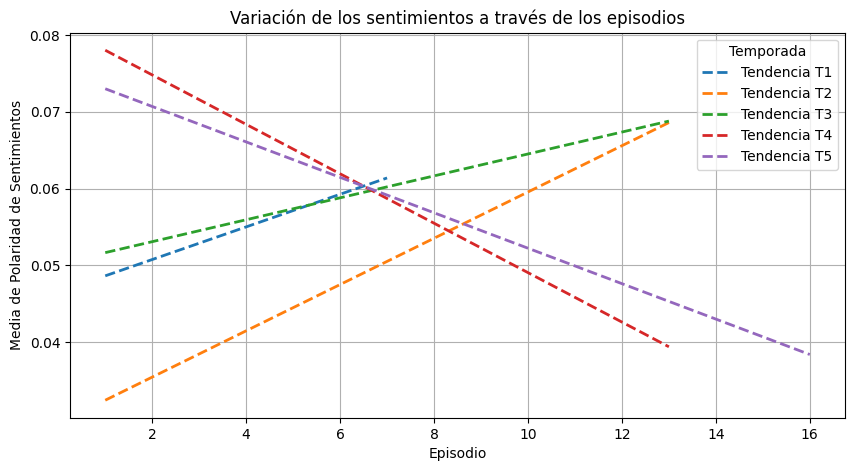

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Crear la figura
plt.figure(figsize=(10, 5))

# Títulos y etiquetas
plt.title('Variación de los sentimientos a través de los episodios')
plt.xlabel('Episodio')
plt.ylabel('Media de Polaridad de Sentimientos')
plt.grid(True)

# Para cada temporada, agregamos una línea de tendencia
for temporada in sentimiento_episodio['Temporada'].unique():
    # Filtrar los datos por temporada
    data_temp = sentimiento_episodio[sentimiento_episodio['Temporada'] == temporada]

    # Ajustar una línea de tendencia con numpy.polyfit (orden 1 para una línea recta)
    z = np.polyfit(data_temp['Episodio'], data_temp['Sentimiento'], 1)
    p = np.poly1d(z)

    # Graficar la línea de tendencia (solo la línea, sin los datos originales)
    plt.plot(data_temp['Episodio'], p(data_temp['Episodio']), linestyle='--', linewidth=2, label=f'Tendencia T{str(temporada)}')

# Añadir la leyenda
plt.legend(title='Temporada', loc='upper right')

# Mostrar la gráfica
plt.show()

#### Scatterplot de relación entre episodio y sentimiento

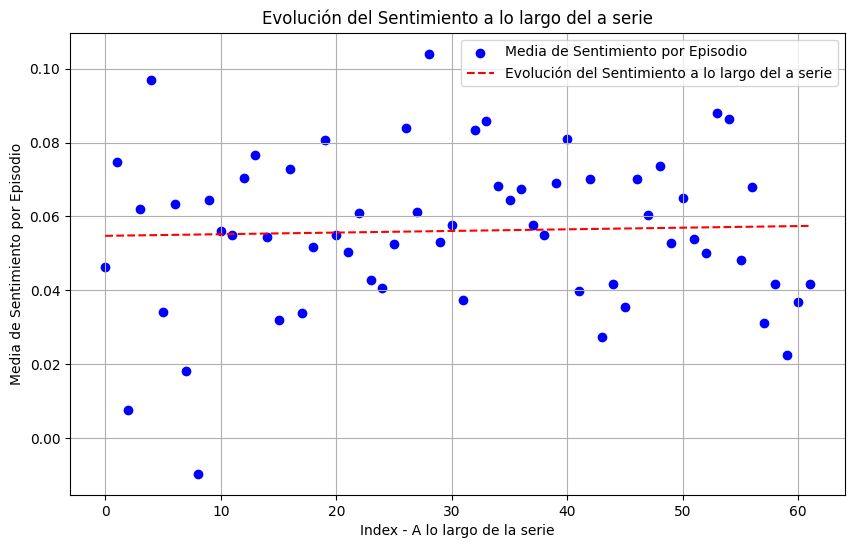

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(sentimiento_episodio.index, sentimiento_episodio['Sentimiento'], color='blue', label='Media de Sentimiento por Episodio')

# Fit a linear regression line
X = sentimiento_episodio.index.values.reshape(-1, 1)  # Reshape for sklearn
y = sentimiento_episodio['Sentimiento']
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

# Plot trend line
plt.plot(sentimiento_episodio.index, y_pred, color='red', linestyle='--', label='Evolución del Sentimiento a lo largo del a serie')

plt.xlabel('Index - A lo largo de la serie')
plt.ylabel('Media de Sentimiento por Episodio')
plt.title('Evolución del Sentimiento a lo largo del a serie')
plt.legend()
plt.grid(True)
plt.show()

#### Scatterplot de relación entre episodio y sentimiento SOLO PARA WALTER

In [25]:
final_df_walter = final_df[final_df['Personaje'] == 'walter']

sentimiento_walter = final_df_walter.groupby(['Temporada', 'Episodio'])['Sentimiento'].mean().reset_index()

# sentimiento_walter = final_df_walter.groupby(['Temporada', 'Episodio'])['Sentimiento'].sum().reset_index()

print(sentimiento_walter)

    Temporada  Episodio  Sentimiento
0           1         1     0.074326
1           1         2     0.050486
2           1         3    -0.017986
3           1         4    -0.016882
4           1         5     0.114944
5           1         6     0.043606
6           1         7     0.094851
7           2         1     0.059802
8           2         2    -0.091576
9           2         3     0.051954
10          2         4     0.069509
11          2         5     0.080036
12          2         6     0.108785
13          2         7     0.080982
14          2         8    -0.004042
15          2         9     0.042716
16          2        10     0.051130
17          2        11     0.021050
18          2        12     0.070185
19          2        13     0.108606
20          3         1     0.012723
21          3         2     0.047139
22          3         3    -0.022182
23          3         4     0.064425
24          3         5    -0.029725
25          3         6     0.063650
2

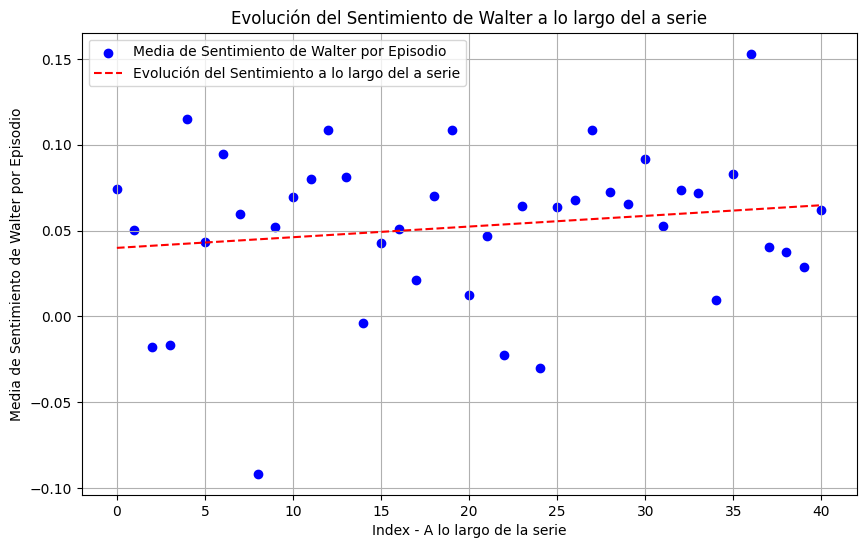

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(sentimiento_walter.index, sentimiento_walter['Sentimiento'], color='blue', label='Media de Sentimiento de Walter por Episodio')

# Fit a linear regression line
X = sentimiento_walter.index.values.reshape(-1, 1)  # Reshape for sklearn
y = sentimiento_walter['Sentimiento']
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

# Plot trend line
plt.plot(sentimiento_walter.index, y_pred, color='red', linestyle='--', label='Evolución del Sentimiento a lo largo del a serie')

plt.xlabel('Index - A lo largo de la serie')
plt.ylabel('Media de Sentimiento de Walter por Episodio')
plt.title('Evolución del Sentimiento de Walter a lo largo del a serie')
plt.legend()
plt.grid(True)
plt.show()

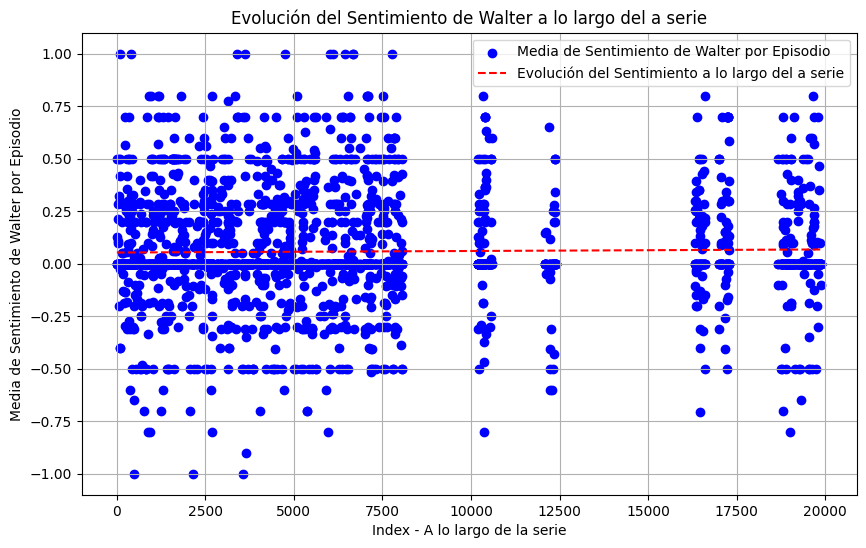

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(final_df_walter.index, final_df_walter['Sentimiento'], color='blue', label='Media de Sentimiento de Walter por Episodio')

# Fit a linear regression line
X = final_df_walter.index.values.reshape(-1, 1)  # Reshape for sklearn
y = final_df_walter['Sentimiento']
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

# Plot trend line
plt.plot(final_df_walter.index, y_pred, color='red', linestyle='--', label='Evolución del Sentimiento a lo largo del a serie')

plt.xlabel('Index - A lo largo de la serie')
plt.ylabel('Media de Sentimiento de Walter por Episodio')
plt.title('Evolución del Sentimiento de Walter a lo largo del a serie')
plt.legend()
plt.grid(True)
plt.show()

### Obtener sentimientos con TEXTBLOB y una "custom bad word list"

In [28]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('/content/drive/Shareddrives/Capstone/preprocessing_wip_Maite/bad_words_for_textblob.xlsx')

# Convert the DataFrame to a dictionary
custom_negative_words = dict(zip(df.iloc[:, 0], df.iloc[:, 1]))

print(custom_negative_words)

{'abandoned': -0.8, 'absolutelynone': -0.8, 'abuse': -0.8, 'accident': -0.6, 'addiction': -0.8, 'affair': -0.6, 'afraid': -0.6, 'agitated': -0.6, 'aint': -0.4, 'alcoholic': -0.7, 'alone': -0.6, 'anal': -0.5, 'angrily': -0.8, 'angry': -0.8, 'annoying': -0.6, 'ant': -0.4, 'anxiety': -0.7, 'anxious': -0.7, 'apologize': -0.6, 'arent': -0.5, 'argument': -0.6, 'arrest': -0.9, 'arrested': -0.9, 'arresting': -0.9, 'ash': -0.3, 'ashamed': -0.9, 'assassin': -1.0, 'assault': -1.0, 'asshole': -0.9, 'attack': -0.8, 'awful': -0.9, 'back': -0.2, 'backfire': -0.5, 'backslid': -0.5, 'bad': -0.7, 'badger': -0.5, 'bam': -0.5, 'bandaids': -0.2, 'barely': -0.5, 'bastard': -0.8, 'beaner': -1.0, 'betrayal': -0.7, 'bitch': -0.8, 'blackmailing': -0.9, 'bleeding': -0.6, 'blew': -0.5, 'blood': -0.7, 'bloodshed': -0.9, 'blow': -0.5, 'bomb': -0.6, 'bonehead': -0.7, 'bore': -0.5, 'bored': -0.5, 'bothered': -0.6, 'breakdown': -0.6, 'breakin': -0.5, 'breaking': -0.5, 'broke': -0.7, 'broken': -0.7, 'bullshit': -0.9, '

In [29]:
from textblob import TextBlob

# Custom sentiment function
def custom_sentiment(words):
    # Initialize total sentiment score
    custom_score = 0.0  # Ensure it's a float to handle decimal values
    custom_count = 0

    # Check if any words are in the custom sentiment dictionary
    for word in words:
        word_lower = word.lower()  # Convert word to lowercase

        # Safely get the value from the dictionary, or return None if not found
        sentiment_value = custom_negative_words.get(word_lower)

        # If the word exists in the custom dictionary, add its value
        if sentiment_value is not None:
            custom_score += sentiment_value
            custom_count += 1

    # Calculate average score for custom words if any were found
    if custom_count > 0:
        custom_avg_score = custom_score / custom_count
    else:
        # If no custom words are found, use TextBlob sentiment
        custom_avg_score = TextBlob(' '.join(words)).sentiment.polarity

    return custom_avg_score

In [30]:
final_df.loc[:, 'custom_sentiment'] = final_df['Palabras_clave'].apply(custom_sentiment)

output_path = '/content/drive/Shareddrives/Capstone/preprocessing_wip_Maite/final_df_words_sentiments_custom_sentiments.xlsx'

final_df.to_excel(output_path, index=False)

In [31]:
# sentimientos = final_df[final_df['custom_sentiment'] != 0]['custom_sentiment']
# sentimientos

sentimientos = final_df['custom_sentiment']
sentimientos

,custom_sentiment
0,-0.40
1,0.00
2,0.00
3,0.80
4,0.00
...,...
19899,0.00
19900,-0.55
19901,-0.80
19902,-0.40


### Histograma de custom_sentiment con TEXTBLOB

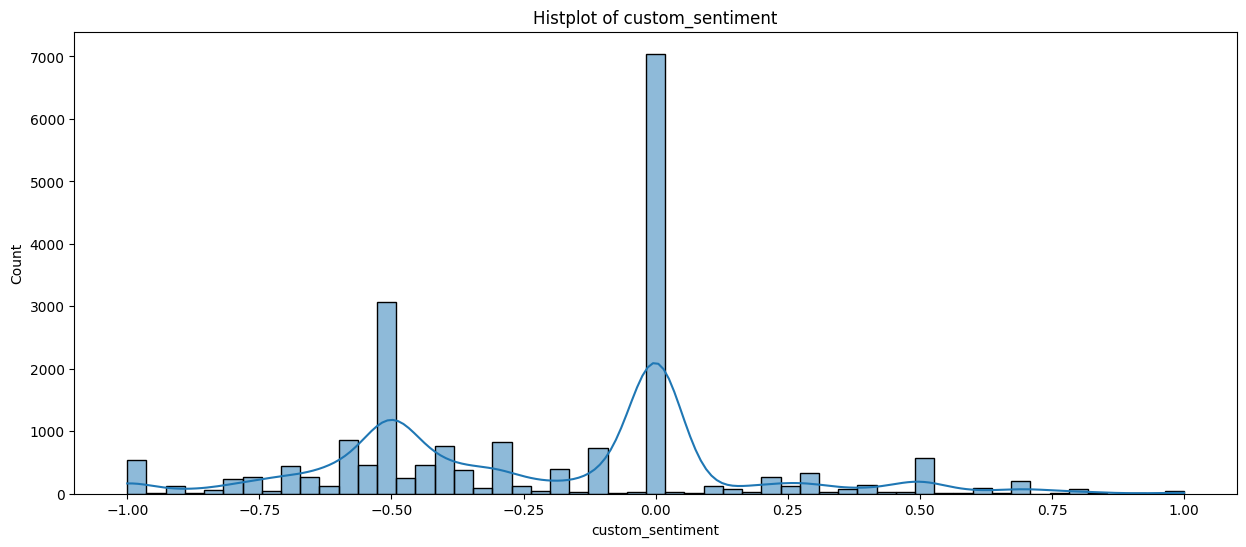

In [32]:
plt.figure(1 , figsize = (15 , 6))
n = 0
sns.histplot(sentimientos , kde=True)
plt.title('Histplot of custom_sentiment')
plt.show()

### Plottear la distribución de custom_sentiment por cada personaje

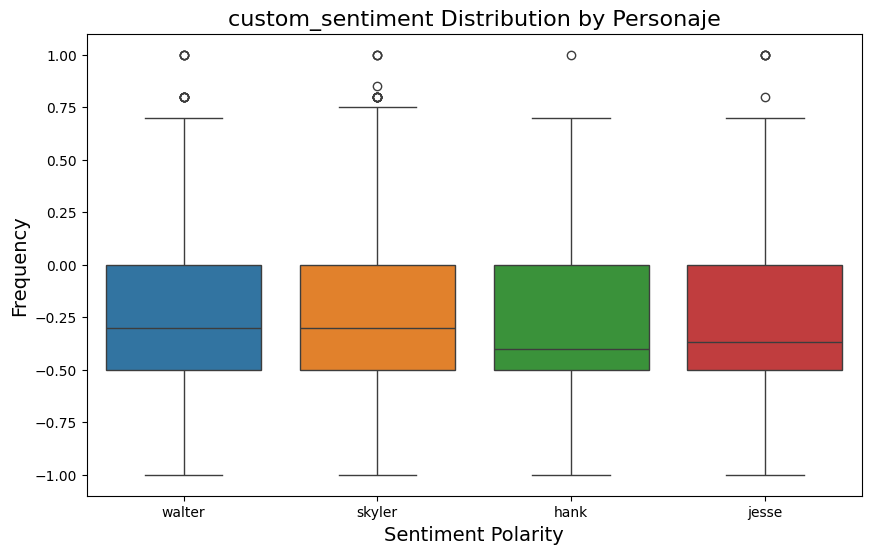

In [33]:
personajes_seleccionados = ['walter', 'jesse', 'skyler', 'hank']
df_personajes_seleccionados = final_df[final_df['Personaje'].isin(personajes_seleccionados)]

# Plot sentiment distribution with 'Personaje' as hue
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_personajes_seleccionados, x='Personaje', y='custom_sentiment', hue='Personaje')

# Set title and labels
plt.title('custom_sentiment Distribution by Personaje', fontsize=16)
plt.xlabel('Sentiment Polarity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the plot
plt.show()

### Agrupar custom_sentiments por cada episodio y realizar plot

In [34]:
# Quitar valores centrales iguales a cero

# final_df = final_df[final_df['Sentimiento'] != 0]

# Elegir sólo los valores negativos

# final_df_menor_cero = final_df[final_df['custom_sentiment'] < 0]

In [35]:
# custom_sentiment_episodio = final_df.groupby(['Temporada', 'Episodio'])['custom_sentiment'].mean().reset_index()

custom_sentiment_episodio = final_df.groupby(['Temporada', 'Episodio'])['custom_sentiment'].sum().reset_index()

print(custom_sentiment_episodio)

    Temporada  Episodio  custom_sentiment
0           1         1        -75.058968
1           1         2        -48.202449
2           1         3        -71.641349
3           1         4        -48.817374
4           1         5        -58.945238
..        ...       ...               ...
57          5        12        -90.358263
58          5        13        -88.312460
59          5        14        -79.561472
60          5        15        -66.297518
61          5        16        -61.103160

[62 rows x 3 columns]


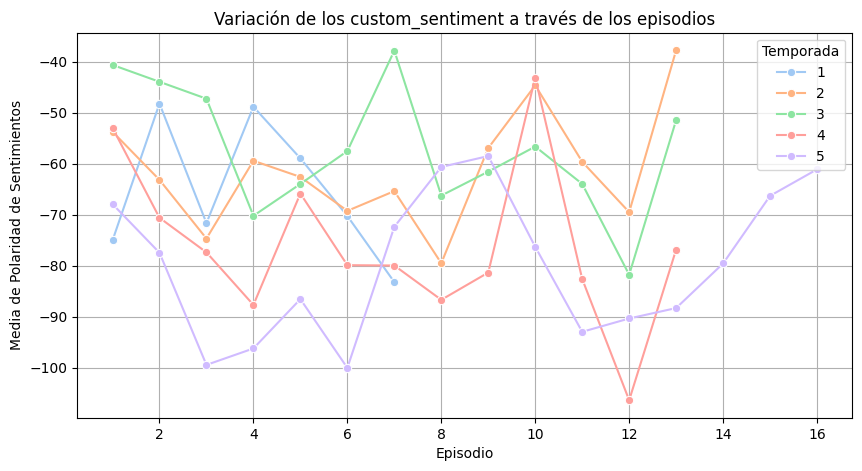

In [36]:
# plot sentiment trend
plt.figure(figsize=(10, 5))
sns.lineplot(data=custom_sentiment_episodio, x='Episodio', y='custom_sentiment', hue='Temporada', marker='o', palette='pastel')
plt.title('Variación de los custom_sentiment a través de los episodios')
plt.xlabel('Episodio')
plt.ylabel('Media de Polaridad de Sentimientos')
plt.legend(title='Temporada', loc='upper right')
plt.grid(True)
plt.show()

#### Ver tendencia a lo largo de los episodios de custom_sentiment

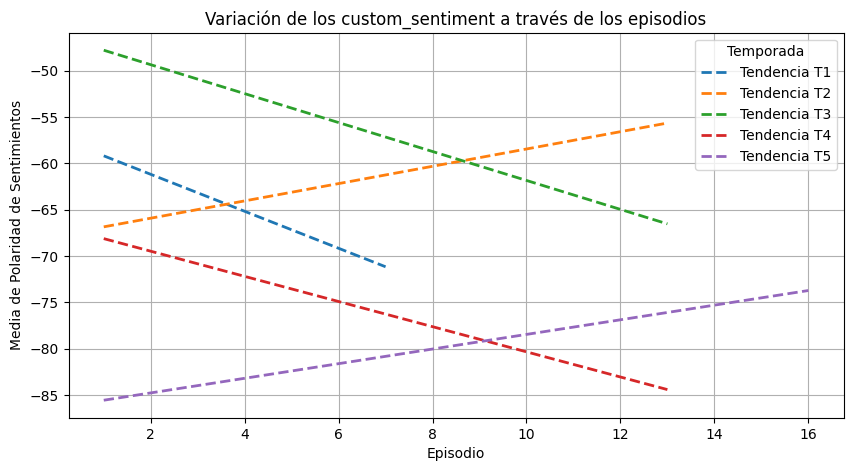

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Crear la figura
plt.figure(figsize=(10, 5))

# Títulos y etiquetas
plt.title('Variación de los custom_sentiment a través de los episodios')
plt.xlabel('Episodio')
plt.ylabel('Media de Polaridad de Sentimientos')
plt.grid(True)

# Para cada temporada, agregamos una línea de tendencia
for temporada in custom_sentiment_episodio['Temporada'].unique():
    # Filtrar los datos por temporada
    data_temp = custom_sentiment_episodio[custom_sentiment_episodio['Temporada'] == temporada]

    # Ajustar una línea de tendencia con numpy.polyfit (orden 1 para una línea recta)
    z = np.polyfit(data_temp['Episodio'], data_temp['custom_sentiment'], 1)
    p = np.poly1d(z)

    # Graficar la línea de tendencia (solo la línea, sin los datos originales)
    plt.plot(data_temp['Episodio'], p(data_temp['Episodio']), linestyle='--', linewidth=2, label=f'Tendencia T{str(temporada)}')

# Añadir la leyenda
plt.legend(title='Temporada', loc='upper right')

# Mostrar la gráfica
plt.show()

#### Scatterplot de relación entre episodio y custom_sentiment

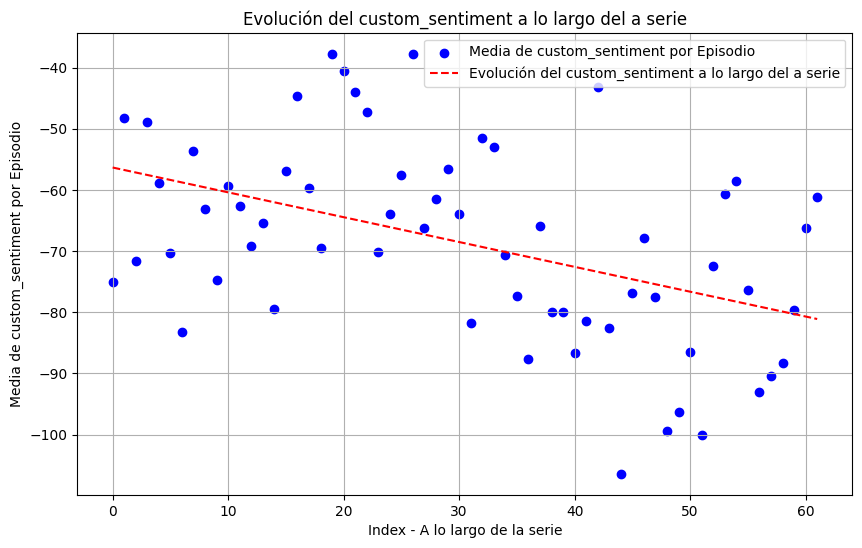

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(custom_sentiment_episodio.index, custom_sentiment_episodio['custom_sentiment'], color='blue', label='Media de custom_sentiment por Episodio')

# Fit a linear regression line
X = custom_sentiment_episodio.index.values.reshape(-1, 1)  # Reshape for sklearn
y = custom_sentiment_episodio['custom_sentiment']
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

# Plot trend line
plt.plot(custom_sentiment_episodio.index, y_pred, color='red', linestyle='--', label='Evolución del custom_sentiment a lo largo del a serie')

plt.xlabel('Index - A lo largo de la serie')
plt.ylabel('Media de custom_sentiment por Episodio')
plt.title('Evolución del custom_sentiment a lo largo del a serie')
plt.legend()
plt.grid(True)
plt.show()

#### Scatterplot de relación entre episodio y sentimiento SOLO PARA WALTER

In [39]:
final_df_walter = final_df[final_df['Personaje'] == 'walter']

# sentimiento_walter = final_df_walter.groupby(['Temporada', 'Episodio'])['custom_sentiment'].mean().reset_index()

sentimiento_walter = final_df_walter.groupby(['Temporada', 'Episodio'])['custom_sentiment'].sum().reset_index()

print(sentimiento_walter)

    Temporada  Episodio  custom_sentiment
0           1         1        -26.084841
1           1         2        -20.760526
2           1         3        -18.959683
3           1         4         -9.436325
4           1         5        -10.264286
5           1         6        -18.112024
6           1         7        -21.202857
7           2         1        -17.143462
8           2         2         -7.790152
9           2         3         -9.491667
10          2         4        -20.337695
11          2         5        -11.320317
12          2         6        -10.176894
13          2         7        -16.946429
14          2         8        -15.962500
15          2         9        -27.088036
16          2        10        -10.955952
17          2        11        -15.589821
18          2        12        -20.941786
19          2        13         -6.542143
20          3         1         -7.402857
21          3         2        -10.310952
22          3         3         -6

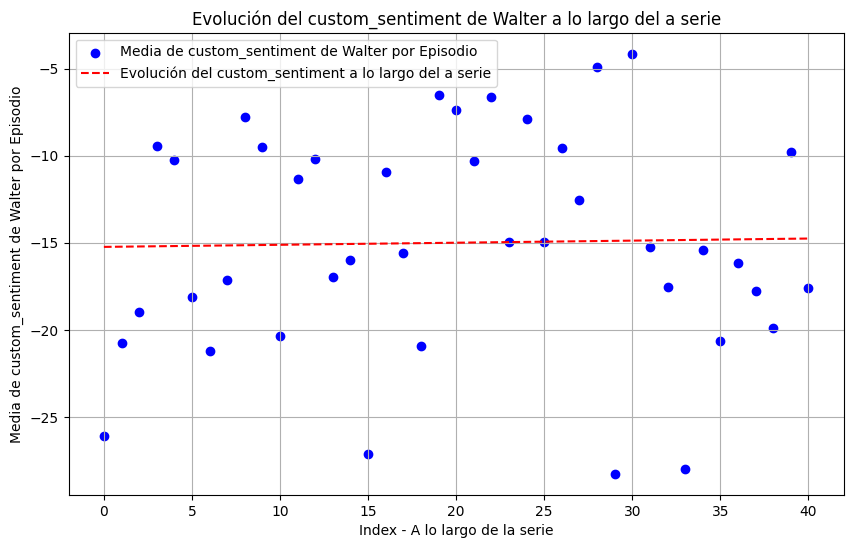

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(sentimiento_walter.index, sentimiento_walter['custom_sentiment'], color='blue', label='Media de custom_sentiment de Walter por Episodio')

# Fit a linear regression line
X = sentimiento_walter.index.values.reshape(-1, 1)  # Reshape for sklearn
y = sentimiento_walter['custom_sentiment']
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

# Plot trend line
plt.plot(sentimiento_walter.index, y_pred, color='red', linestyle='--', label='Evolución del custom_sentiment a lo largo del a serie')

plt.xlabel('Index - A lo largo de la serie')
plt.ylabel('Media de custom_sentiment de Walter por Episodio')
plt.title('Evolución del custom_sentiment de Walter a lo largo del a serie')
plt.legend()
plt.grid(True)
plt.show()

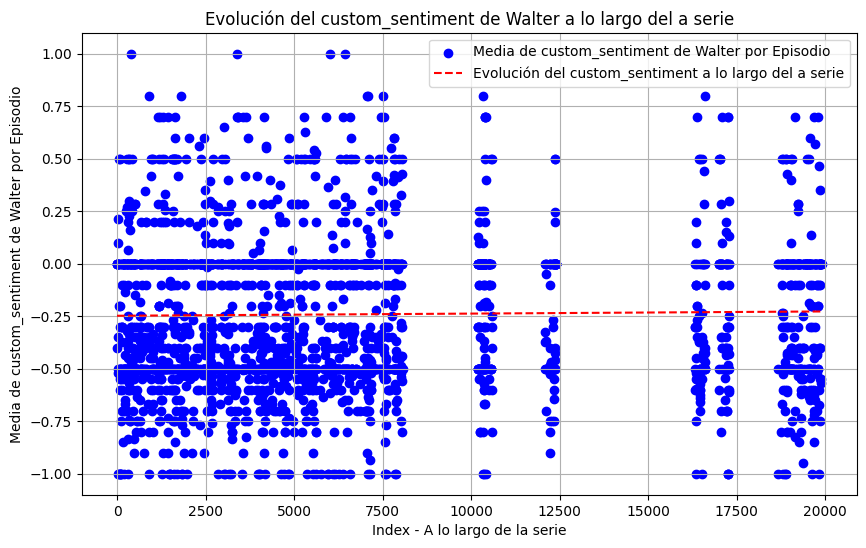

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(final_df_walter.index, final_df_walter['custom_sentiment'], color='blue', label='Media de custom_sentiment de Walter por Episodio')

# Fit a linear regression line
X = final_df_walter.index.values.reshape(-1, 1)  # Reshape for sklearn
y = final_df_walter['custom_sentiment']
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

# Plot trend line
plt.plot(final_df_walter.index, y_pred, color='red', linestyle='--', label='Evolución del custom_sentiment a lo largo del a serie')

plt.xlabel('Index - A lo largo de la serie')
plt.ylabel('Media de custom_sentiment de Walter por Episodio')
plt.title('Evolución del custom_sentiment de Walter a lo largo del a serie')
plt.legend()
plt.grid(True)
plt.show()

## <font color='red'>VADER</font>

Specifically designed for social media text and works well with short and informal texts.

## <font color='red'>SENTIWORDNET</font>

Based on the WordNet database, this lexicon assigns positive, negative, and neutral sentiment scores to synsets (groups of words with the same meaning).

### Obtener sentimientos con SENTIWORDNET

In [92]:
!pip install sentiwordnet

ERROR: Could not find a version that satisfies the requirement sentiwordnet (from versions: none)
ERROR: No matching distribution found for sentiwordnet


In [43]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def vader_get_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()

    # If 'text' is a list of words, join them into a single string
    if isinstance(text, list):
        text = ' '.join(text)

    # Call the polarity_scores method on the text
    return analyzer.polarity_scores(text)

In [74]:
# apply sentiment analysis
final_df['Sentimiento_Vader'] = final_df['Texto'].apply(vader_get_sentiment)

output_path = '/content/drive/Shareddrives/Capstone/preprocessing_wip_Maite/final_df_words_sentiments_customsentiments_vader.xlsx'

final_df.to_excel(output_path, index=False)

In [75]:
# Extract the 'neg' values
final_df['vader_negative'] = final_df['Sentimiento_Vader'].apply(lambda x: x['neg'])

final_df['vader_negative']

,vader_negative
0,0.030
1,0.000
2,0.000
3,0.000
4,0.000
...,...
19899,0.000
19900,0.083
19901,0.000
19902,0.000


In [76]:
# Extract the 'neu' values
final_df['vader_positive'] = final_df['Sentimiento_Vader'].apply(lambda x: x['pos'])

In [77]:
# Extract the 'positive' values
final_df['vader_neutral'] = final_df['Sentimiento_Vader'].apply(lambda x: x['neu'])

In [78]:
# Extract the 'compound' values
final_df['vader_compound'] = final_df['Sentimiento_Vader'].apply(lambda x: x['compound'])

In [79]:
output_path = '/content/drive/Shareddrives/Capstone/preprocessing_wip_Maite/final_df_words_sentiments_customsentiments_vaderseparados.xlsx'

final_df.to_excel(output_path, index=False)

### Histograma de los "vaders" (positivo, negativo, neutro y compound)

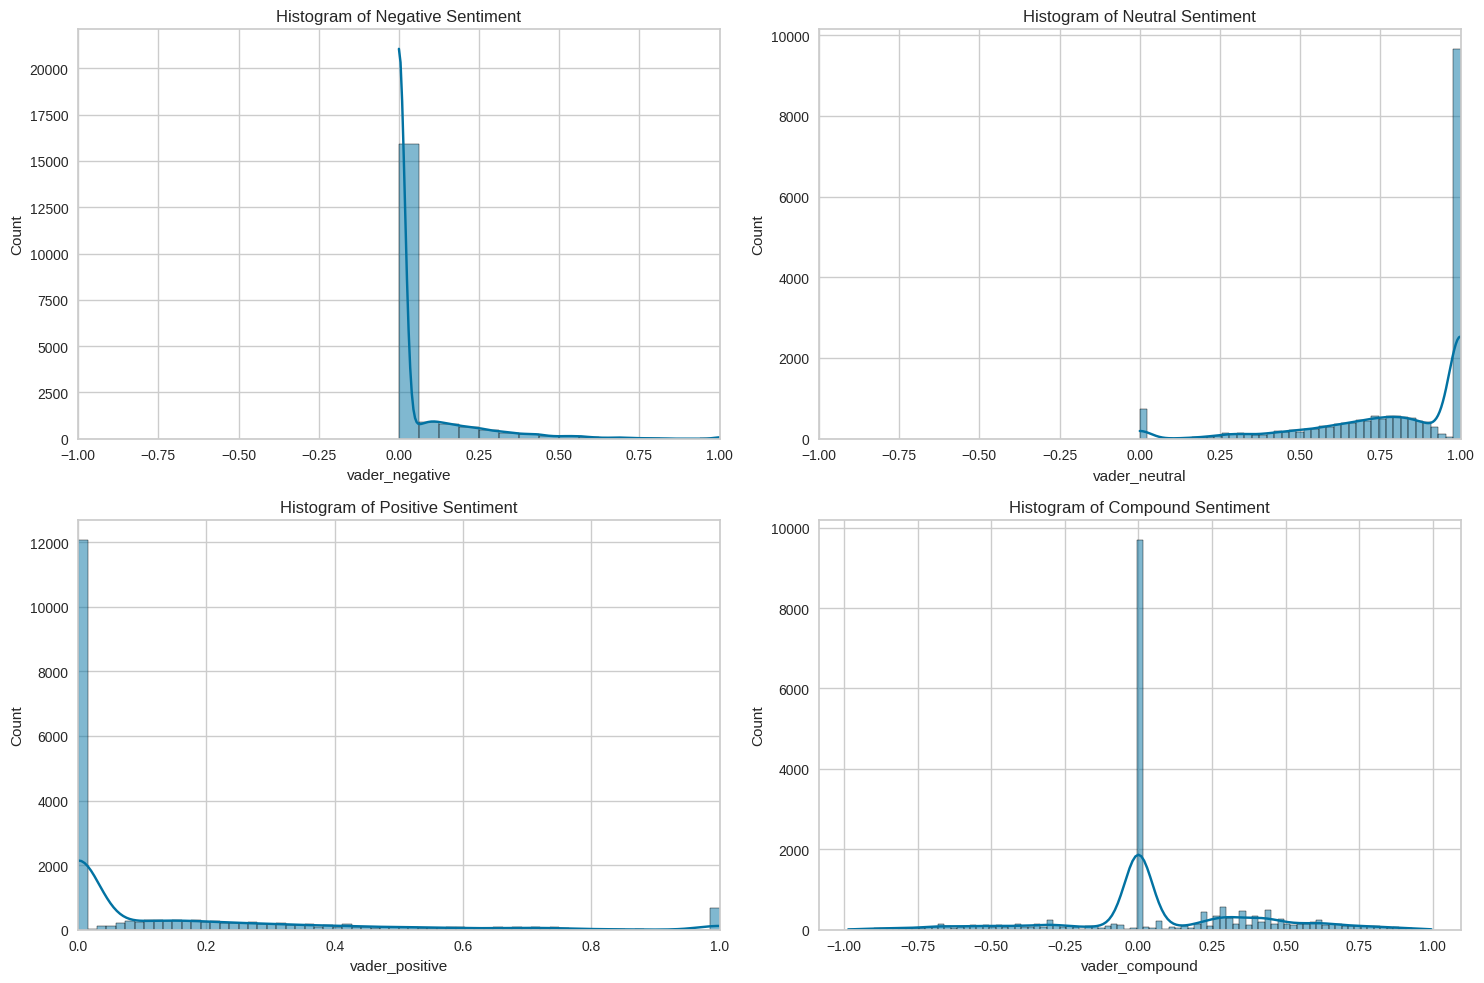

In [80]:
# Set up the 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot for 'neg'
sns.histplot(final_df['vader_negative'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Negative Sentiment')
axes[0, 0].set_xlim(-1, 1)

# Plot for 'neu'
sns.histplot(final_df['vader_neutral'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Neutral Sentiment')
axes[0, 1].set_xlim(-1, 1)

# Plot for 'pos'
sns.histplot(final_df['vader_positive'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Positive Sentiment')
axes[1, 0].set_xlim(0, 1)

# Plot for 'compound'
sns.histplot(final_df['vader_compound'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Histogram of Compound Sentiment')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

#### Ver tendencia a lo largo de los episodios de los vaders

In [51]:
# Quitar valores centrales iguales a cero

# final_df = final_df[final_df['Sentimiento'] != 0]

# Elegir sólo los valores negativos

# final_df_menor_cero = final_df[final_df['Sentimiento'] < 0]

In [81]:
vader_compound = final_df.groupby(['Temporada', 'Episodio'])['vader_compound'].mean().reset_index()

vader_negative = final_df.groupby(['Temporada', 'Episodio'])['vader_negative'].mean().reset_index()

vader_positive = final_df.groupby(['Temporada', 'Episodio'])['vader_positive'].mean().reset_index()

vader_neutral = final_df.groupby(['Temporada', 'Episodio'])['vader_neutral'].mean().reset_index()

# sentimiento_episodio = final_df_menor_cero.groupby(['Temporada', 'Episodio'])['Sentimiento'].sum().reset_index()

print(vader_compound)

    Temporada  Episodio  vader_compound
0           1         1        0.048972
1           1         2        0.082391
2           1         3        0.003344
3           1         4        0.110762
4           1         5        0.134307
..        ...       ...             ...
57          5        12        0.043932
58          5        13        0.074024
59          5        14       -0.009212
60          5        15        0.110774
61          5        16        0.096538

[62 rows x 3 columns]


### Plottear los sentimientos por cada episodio con vader

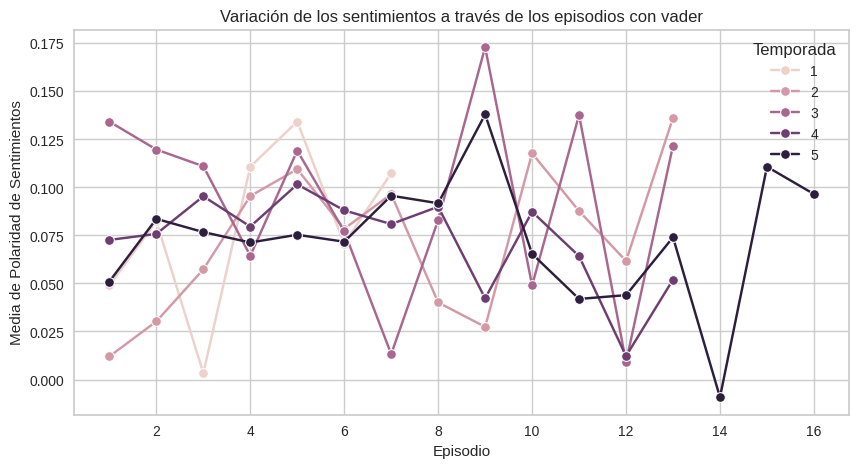

In [82]:
# plot sentiment trend
plt.figure(figsize=(10, 5))
sns.lineplot(data=vader_compound, x='Episodio', y='vader_compound', hue='Temporada', marker='o')
plt.title('Variación de los sentimientos a través de los episodios con vader')
plt.xlabel('Episodio')
plt.ylabel('Media de Polaridad de Sentimientos')
plt.legend(title='Temporada', loc='upper right')
plt.grid(True)
plt.show()

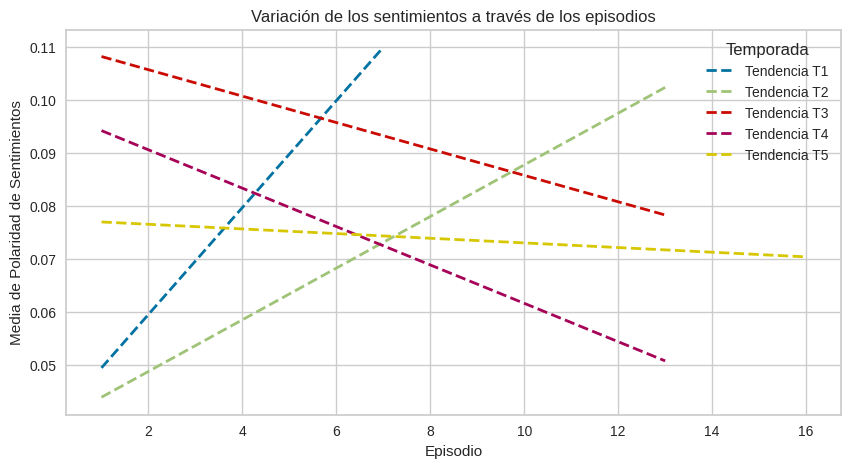

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Crear la figura
plt.figure(figsize=(10, 5))

# Títulos y etiquetas
plt.title('Variación de los sentimientos a través de los episodios')
plt.xlabel('Episodio')
plt.ylabel('Media de Polaridad de Sentimientos')
plt.grid(True)

# Para cada temporada, agregamos una línea de tendencia
for temporada in vader_compound['Temporada'].unique():
    # Filtrar los datos por temporada
    data_temp = vader_compound[vader_compound['Temporada'] == temporada]

    # Ajustar una línea de tendencia con numpy.polyfit (orden 1 para una línea recta)
    z = np.polyfit(data_temp['Episodio'], data_temp['vader_compound'], 1)
    p = np.poly1d(z)

    # Graficar la línea de tendencia (solo la línea, sin los datos originales)
    plt.plot(data_temp['Episodio'], p(data_temp['Episodio']), linestyle='--', linewidth=2, label=f'Tendencia T{str(temporada)}')

# Añadir la leyenda
plt.legend(title='Temporada', loc='upper right')

# Mostrar la gráfica
plt.show()

### Scatterplot de relación entre episodio y vader_compound

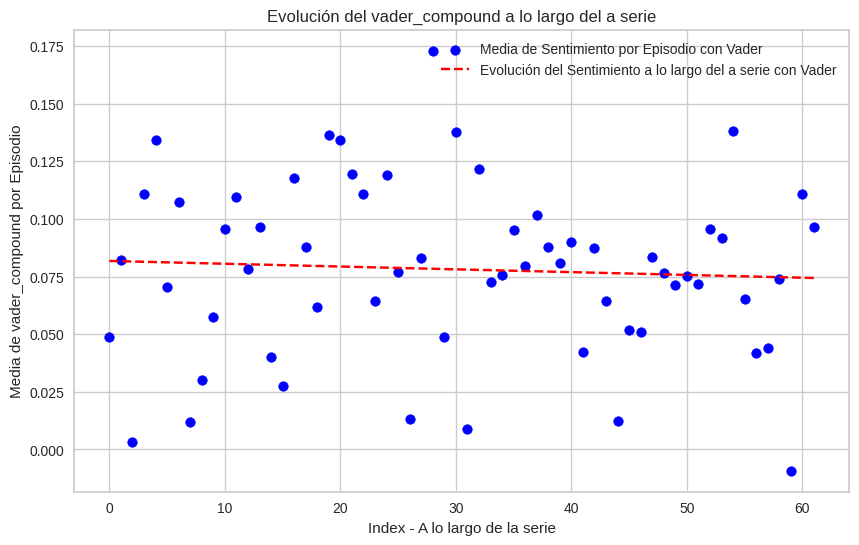

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(vader_compound.index, vader_compound['vader_compound'], color='blue', label='Media de Sentimiento por Episodio con Vader')

# Fit a linear regression line
X = vader_compound.index.values.reshape(-1, 1)  # Reshape for sklearn
y = vader_compound['vader_compound']
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

# Plot trend line
plt.plot(vader_compound.index, y_pred, color='red', linestyle='--', label='Evolución del Sentimiento a lo largo del a serie con Vader')

plt.xlabel('Index - A lo largo de la serie')
plt.ylabel('Media de vader_compound por Episodio')
plt.title('Evolución del vader_compound a lo largo del a serie')
plt.legend()
plt.grid(True)
plt.show()

In [85]:
final_df_walter = final_df[final_df['Personaje'] == 'walter']

sentimiento_walter = final_df_walter.groupby(['Temporada', 'Episodio'])['vader_compound'].mean().reset_index()

# sentimiento_walter = final_df_walter.groupby(['Temporada', 'Episodio'])['vader_compound'].sum().reset_index()

print(sentimiento_walter)

    Temporada  Episodio  vader_compound
0           1         1        0.090199
1           1         2        0.120632
2           1         3       -0.036033
3           1         4        0.038934
4           1         5        0.232648
5           1         6        0.141660
6           1         7        0.118280
7           2         1        0.029409
8           2         2       -0.058609
9           2         3        0.102909
10          2         4        0.078364
11          2         5        0.078420
12          2         6        0.264958
13          2         7        0.027970
14          2         8       -0.037528
15          2         9        0.008466
16          2        10        0.162418
17          2        11        0.102808
18          2        12        0.104898
19          2        13        0.146012
20          3         1        0.201982
21          3         2        0.168133
22          3         3        0.188682
23          3         4        0.092216


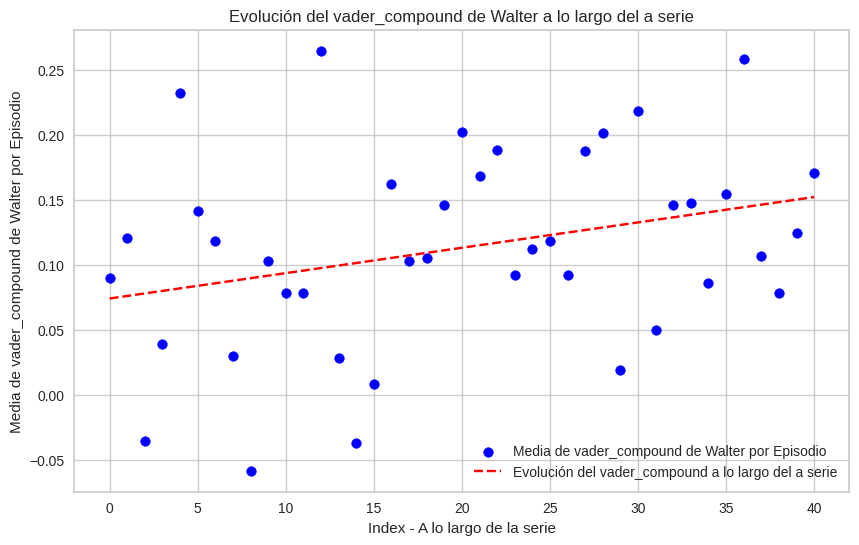

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(sentimiento_walter.index, sentimiento_walter['vader_compound'], color='blue', label='Media de vader_compound de Walter por Episodio')

# Fit a linear regression line
X = sentimiento_walter.index.values.reshape(-1, 1)  # Reshape for sklearn
y = sentimiento_walter['vader_compound']
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

# Plot trend line
plt.plot(sentimiento_walter.index, y_pred, color='red', linestyle='--', label='Evolución del vader_compound a lo largo del a serie')

plt.xlabel('Index - A lo largo de la serie')
plt.ylabel('Media de vader_compound de Walter por Episodio')
plt.title('Evolución del vader_compound de Walter a lo largo del a serie')
plt.legend()
plt.grid(True)
plt.show()

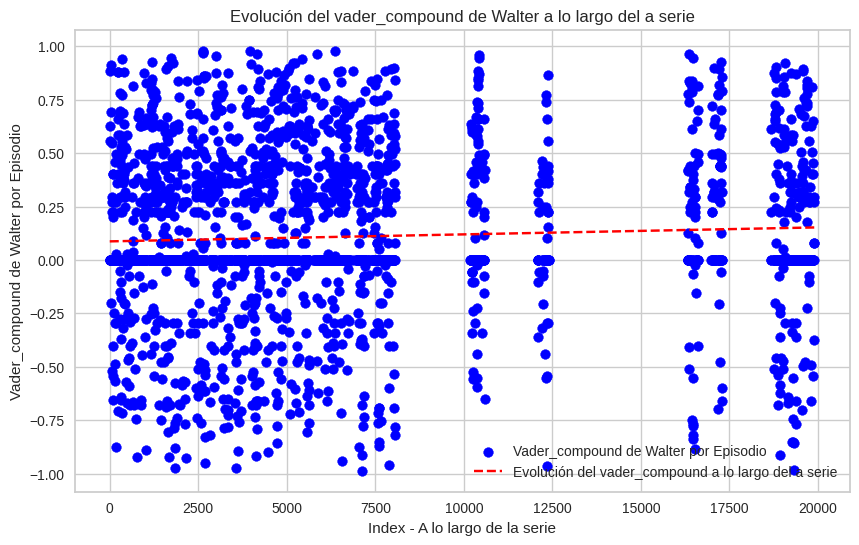

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(final_df_walter.index, final_df_walter['vader_compound'], color='blue', label='Vader_compound de Walter por Episodio')

# Fit a linear regression line
X = final_df_walter.index.values.reshape(-1, 1)  # Reshape for sklearn
y = final_df_walter['vader_compound']
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

# Plot trend line
plt.plot(final_df_walter.index, y_pred, color='red', linestyle='--', label='Evolución del vader_compound a lo largo del a serie')

plt.xlabel('Index - A lo largo de la serie')
plt.ylabel('Vader_compound de Walter por Episodio')
plt.title('Evolución del vader_compound de Walter a lo largo del a serie')
plt.legend()
plt.grid(True)
plt.show()

### Scatterplot de relación entre episodio y vader_negative

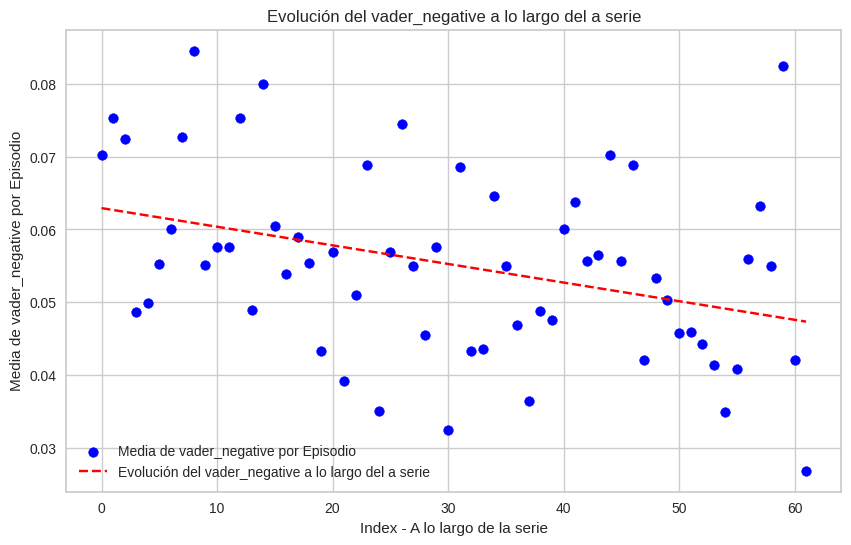

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(vader_negative.index, vader_negative['vader_negative'], color='blue', label='Media de vader_negative por Episodio')

# Fit a linear regression line
X = vader_negative.index.values.reshape(-1, 1)  # Reshape for sklearn
y = vader_negative['vader_negative']
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

# Plot trend line
plt.plot(vader_negative.index, y_pred, color='red', linestyle='--', label='Evolución del vader_negative a lo largo del a serie')

plt.xlabel('Index - A lo largo de la serie')
plt.ylabel('Media de vader_negative por Episodio')
plt.title('Evolución del vader_negative a lo largo del a serie')
plt.legend()
plt.grid(True)
plt.show()

In [89]:
final_df_walter = final_df[final_df['Personaje'] == 'walter']

sentimiento_walter = final_df_walter.groupby(['Temporada', 'Episodio'])['vader_negative'].mean().reset_index()

sentimiento_walter = final_df_walter.groupby(['Temporada', 'Episodio'])['vader_negative'].sum().reset_index()

print(sentimiento_walter)

    Temporada  Episodio  vader_negative
0           1         1           5.469
1           1         2           4.912
2           1         3           4.896
3           1         4           2.303
4           1         5           1.707
5           1         6           3.259
6           1         7           5.210
7           2         1           4.100
8           2         2           1.721
9           2         3           2.547
10          2         4           5.416
11          2         5           1.106
12          2         6           1.763
13          2         7           4.060
14          2         8           5.791
15          2         9           7.159
16          2        10           2.268
17          2        11           2.900
18          2        12           4.184
19          2        13           1.513
20          3         1           0.939
21          3         2           1.752
22          3         3           1.217
23          3         4           3.896


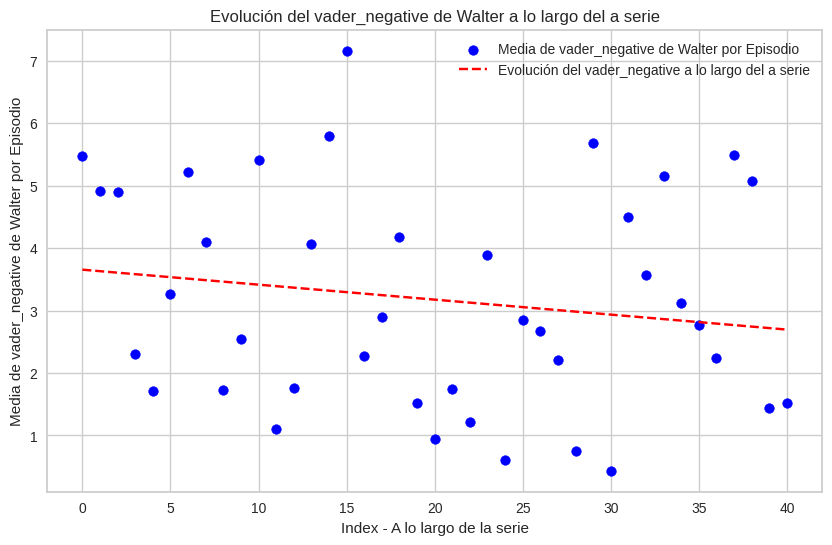

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(sentimiento_walter.index, sentimiento_walter['vader_negative'], color='blue', label='Media de vader_negative de Walter por Episodio')

# Fit a linear regression line
X = sentimiento_walter.index.values.reshape(-1, 1)  # Reshape for sklearn
y = sentimiento_walter['vader_negative']
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

# Plot trend line
plt.plot(sentimiento_walter.index, y_pred, color='red', linestyle='--', label='Evolución del vader_negative a lo largo del a serie')

plt.xlabel('Index - A lo largo de la serie')
plt.ylabel('Media de vader_negative de Walter por Episodio')
plt.title('Evolución del vader_negative de Walter a lo largo del a serie')
plt.legend()
plt.grid(True)
plt.show()

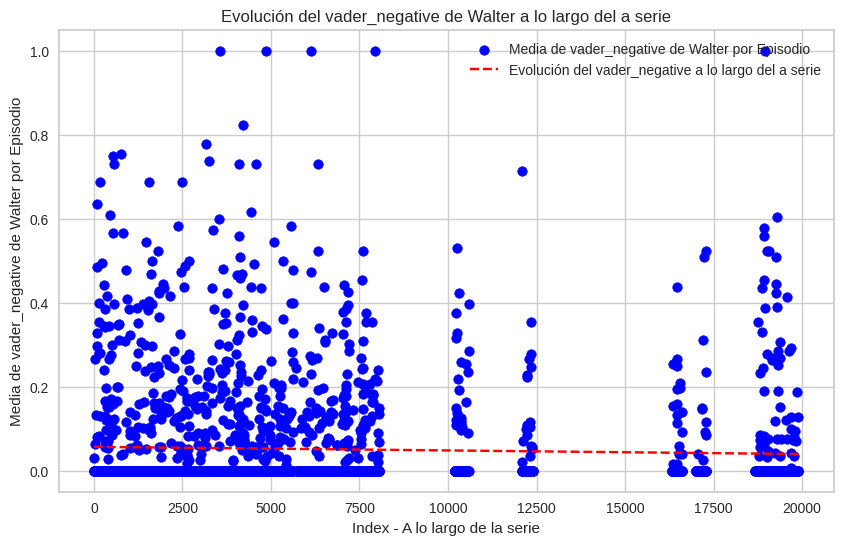

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(final_df_walter.index, final_df_walter['vader_negative'], color='blue', label='Media de vader_negative de Walter por Episodio')

# Fit a linear regression line
X = final_df_walter.index.values.reshape(-1, 1)  # Reshape for sklearn
y = final_df_walter['vader_negative']
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

# Plot trend line
plt.plot(final_df_walter.index, y_pred, color='red', linestyle='--', label='Evolución del vader_negative a lo largo del a serie')

plt.xlabel('Index - A lo largo de la serie')
plt.ylabel('Media de vader_negative de Walter por Episodio')
plt.title('Evolución del vader_negative de Walter a lo largo del a serie')
plt.legend()
plt.grid(True)
plt.show()

# <font color='red'>MACHINE LEARNING NO SUPERVISADO</font>

### StandardScaler

In [63]:
# Dropeo las variables categóricas

X = final_df.drop(columns=['Titulo', 'Personaje', 'Texto', 'Palabras_clave'], axis=1)

X.head(2)

,Temporada,Episodio,Sentimiento,custom_sentiment,Sentimiento_Vader,vader_negative,vader_positive,vader_neutral,vader_compound
0,1,1,0.128788,-0.4,"{'neg': 0.04, 'neu': 0.701, 'pos': 0.259, 'com...",0.04,0.259,0.701,0.891
1,1,1,0.000000,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00,0.000,1.000,0.000


In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline

pip = Pipeline(
    steps=[('sc', StandardScaler())]
)

pre = ColumnTransformer(
    transformers=[
        ('sc', pip, make_column_selector(dtype_include=int))
    ]
    , remainder='passthrough'
    , verbose_feature_names_out=False
    , sparse_threshold=0
)
pre.set_output(transform='pandas')

X = pre.fit_transform(X)

## K-Means Clustering

In [65]:
# Verificar el tipo de dato de las columnas que conservamos

X.dtypes

,0
Temporada,float64
Episodio,float64
Sentimiento,float64
custom_sentiment,float64
Sentimiento_Vader,object
vader_negative,float64
vader_positive,float64
vader_neutral,float64
vader_compound,float64


In [66]:
# Convertir columnas string en int

X.Temporada = X.Temporada.astype("int")
X.Episodio = X.Episodio.astype("int")

In [67]:
# Chequear que no haya valores nulos

X.isnull().sum()

,0
Temporada,0
Episodio,0
Sentimiento,0
custom_sentiment,0
Sentimiento_Vader,0
vader_negative,0
vader_positive,0
vader_neutral,0
vader_compound,0


In [68]:
# solo_sentiment = X.Sentimiento.to_numpy()
# solo_sentiment

### StandardScaler

In [69]:
final_df.drop(columns=['Sentimiento_Vader'], axis=1, inplace=True)

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline

pip = Pipeline(
    steps=[('sc', StandardScaler())]
)

pre = ColumnTransformer(
    transformers=[
        ('sc', pip, make_column_selector(dtype_include=int))
    ]
    , remainder='passthrough'
    , verbose_feature_names_out=False
    , sparse_threshold=0
)
pre.set_output(transform='pandas')

X = pre.fit_transform(X)

### The Elbow Method

In [71]:
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

In [72]:
km = KMeans(init = 'k-means++', n_init='auto', random_state=0)
visualizer = KElbowVisualizer(km, k=(2, 11))
visualizer.fit(X)
visualizer.show()

TypeError: float() argument must be a string or a real number, not 'dict'

### Aplicación del algoritmo K-Means

In [ ]:
from sklearn.cluster import KMeans

kmeans_data = KMeans(n_clusters=4, init='k-means++', n_init='auto', random_state=0)
kmeans_data_y = kmeans_data.fit_predict(X)

pd.Series(kmeans_data_y).value_counts()

In [ ]:
X

### Plottear resultados del K-Means

In [ ]:
x_copy = X.copy(deep=True)

# Añadir las labels de kmeans_data_y
x_copy['label_str'] = kmeans_data_y.astype(str)
x_copy['label'] = kmeans_data_y + 1

In [ ]:
# x_copy.rename(columns={0:"Temporada", 1:"Episodio", 2:"Sentimiento"}, inplace=True)

In [ ]:
x_copy.columns

In [ ]:
import plotly.express as px

fig = px.scatter_3d(
    data_frame=x_copy
    , x='Temporada'
    , y='Episodio'
    , z='Sentimiento'
    , color='label_str'
    , size='label'
    , color_discrete_map={'0':'red', '1':'blue', '2':'green'}
)

fig.update_layout(
    width=1200,  # Increase width
    height=800   # Increase height
)

fig.show()

## DBSCAN - Density based Clustering

### Limpiar y plottear variables numéricas

In [ ]:
from sklearn.cluster import DBSCAN

# Vamos a usar el dataset inicial, el que incluye las variables categóricas, pero quitando las variables "Texto", "Titulo" y "Palabras_clave".

X_dbscan = final_df.drop(columns=['Texto', 'Titulo', 'Palabras_clave'], axis=1)
X_dbscan.head(2)

In [ ]:
# Verificamos el tipo de dato y realizamos la conversión si necesario

X_dbscan.dtypes

In [ ]:
X_dbscan.Temporada = X_dbscan.Temporada.astype("int")
X_dbscan.Episodio = X_dbscan.Episodio.astype("int")

In [ ]:
plt.figure(1 , figsize = (15 , 6))
n = 0
for x in ['Temporada' , 'Episodio' , 'Sentimiento']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.histplot(X_dbscan[x] , bins = 15, kde=True)
    plt.title('Histplot of {}'.format(x))
plt.show()

### Convertir variables categóricas a variables numéricas

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
X_dbscan['Personaje'] = lb.fit_transform(X_dbscan['Personaje'])
X_dbscan.head()

In [ ]:
# Chequear si hay valores nulos:

X_dbscan.isnull().sum()

### Aplicar algoritmo DBSCAN

In [ ]:
import numpy as np

db = DBSCAN(eps=2, min_samples=4)
labels = db.fit_predict(X_dbscan)

np.unique(labels)

In [ ]:
labels

In [ ]:
X_dbscan['cluster'] = labels.astype(str)
X_dbscan['cluster_size'] = labels+2*10

In [ ]:
X_dbscan.columns

In [ ]:
fig = px.scatter_3d(X_dbscan
                    , x="Temporada"
                    , y="Episodio"
                    , z="Sentimiento"
                    , color='cluster'
                    , size='cluster_size'
                    )

fig.show()

# <font color='red'>MACHINE LEARNING SUPERVISADO</font>

## Naive Bayes Classifier:

A simple probabilistic model that classifies text based on the likelihood of sentiment categories (positive, negative, neutral). It's fast but less effective for more complex sentences.

## Support Vector Machines (SVMs):

SVMs are used to classify text based on separating hyperplanes. They are highly effective for binary classification tasks (positive vs. negative) but can struggle with complex, nuanced sentiment.

## Decision Trees & Random Forests:

These models work by building trees based on feature importance, which can classify text sentiment effectively, but they are less interpretable than some other models.